
# Project: Investigate a TMDb movie data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Import Dictionary</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#data cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
(cleaned from original data on __[kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)__)
<br> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by (|) characters.
<br>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
### The Research Questions
I 'm looking for find answer of some question about this Data, such as:
1. How many films are released each year?
2. Which genres are most popular from year to year?
3. most popular actors/actrees or director?
4. Top 10 directors who get most vote score
5. The trend of annual changes in film profits
6. What kinds of properties are associated with movies that have high revenues?


<a id='import'></a>
## Import Dictionary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling and initial assessment


In [2]:
df1 = pd.read_csv('C:\\Users\\Tecra\\Downloads\\tmdb-movies.csv')
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# to looking at all columns  
pd.set_option('display.max_columns', None)
df1.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# look for instances of missing and types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df1.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df1.duplicated().sum()

1

Assessment : 
* There is 10866 rows and 21 columns in this Dataset.
* we have missing data in some columns (cast, homepage , director, tagline, keywords,overview, runtime, genres, production_companies)
* some of dtype should be change ( release_date)
* There is some problem in data for example runtime = 0  or bujet=0 that need to be checked.
* remove duplicate

<a id='data cleaning'></a>
## Data Cleaning 
### Handling unused and missing or uncorrect values
* drop duplicated rows
* imdb_id, homepage, tagline, release_year and keywords columns are seem unnecessary to include this type of intended analysis
* change dtype release_date to datetime
* replace 0 with NaN in runtime, budjet and revenue columns
* change unit in budjet and revenue columns
* Handling missing values

In [8]:
#hard copy
df = df1.copy()

In [9]:
#drop duplicate
df.drop_duplicates(keep = 'first',inplace= True,ignore_index = True)

In [10]:
#test drop duplicate
df.duplicated().sum()

0

In [11]:
# Convert 'release_date' type from str to datetime 
df["release_date"] = pd.to_datetime(df["release_date"])

In [12]:
df["release_date"].sort_values()

9951    1971-01-15
9960    1971-01-31
9971    1971-02-10
9939    1971-03-03
9931    1971-03-11
           ...    
10662   2070-12-14
10664   2070-12-14
10653   2070-12-16
10680   2070-12-18
10647   2070-12-24
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [13]:
df["release_year"].sort_values()

10171    1960
10140    1960
10141    1960
10142    1960
10143    1960
         ... 
417      2015
416      2015
415      2015
422      2015
0        2015
Name: release_year, Length: 10865, dtype: int64

Comparing release_date with release_year shows something is wronge( 2070-12-24) in relase_date column, so it seem better to drop it

In [14]:
#remove some useless columns 
df.drop(columns=['imdb_id','homepage','tagline','keywords','release_date'],axis =1,inplace=True)

In [15]:
#test for drop columns
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [16]:
#find missing data
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
#explore missin data in cast column
df[df.cast.isnull()==True]

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,47,6.9,2015,0.000000,0.0
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,37,8.2,2015,0.000000,0.0
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,An experimental documentary that explores Saud...,135,Documentary,BBC,19,7.8,2015,0.000000,0.0
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,12,8.0,2015,0.000000,0.0
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,"Compared to girls, research shows that boys in...",88,Documentary,NaN,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,13926,0.253376,0,0,Red's Dream,NaN,John Lasseter,Life as the sole sale item in the clearance co...,4,Animation,Pixar Animation Studios,44,6.6,1987,0.000000,0.0
9754,48714,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,This short film is a metaphor for the Vietnam ...,6,Drama,NaN,12,6.7,1968,0.000000,0.0
10433,48784,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,Lynch's first film project consists of a loop ...,4,Animation,Pensylvania Academy of Fine Arts,16,5.2,1967,1307.352748,0.0
10549,13925,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,A baby lamp finds a ball to play with and it's...,2,Animation|Family,Pixar Animation Studios,81,7.3,1986,0.000000,0.0


I realize that genres most of mising value in cast is Animation or Documentary that make sense, so we can fill this values with 'Unknown'

In [18]:
#fill missing data in cast column
df.cast.fillna(value = 'Unknown',inplace = True)

In [19]:
#explore missin data in director column
df[df.director.isnull()==True]

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,25,Documentary|Science Fiction,Netflix,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,NaN,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,Follow three professional video game players a...,75,Documentary,Valve,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,2 Entertain Video,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,Called the most accurate adaptation of Anne Fr...,100,Drama,Darlow Smithson Productions|British Broadcasti...,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,A B Corp,11,6.1,2009,3.303301e+06,0.000000e+00


I can't find significant reason for misssing data in director column so we can just fill it by 'Unknown'

In [20]:
#fill missing data in director column
df.director.fillna(value = 'Unknown',inplace = True)

In [21]:
#fill missing data in overview column
df.overview.fillna(value = 'No Overview',inplace = True)

In [22]:
#fill missing data in genres column
df.genres.fillna(value = 'Unknown',inplace = True)

In [23]:
#fill missing data in production_companies column
df.production_companies.fillna(value = 'Unknown',inplace = True)

In [24]:
# to make sure there is no null value
df.isnull().sum().any()

False

In [25]:
# runtime should be more than zero
len(df[df.runtime==0])

31

There is just 31 values (runtime=0) that is negligible , so we can remove them.

In [26]:
#remove runtime=0
irun = df.query('runtime == 0').index
df.drop(irun , inplace=True)

In [27]:
#converting revenue_adj and budget_adj to million dollar 
df.revenue = df.revenue.apply(lambda x : int (x/1000000) if x != 0 else x)
df.budget = df.budget.apply(lambda x : int (x/1000000) if x != 0 else x)

In [28]:
#revenue and budget should be more than zero to check how many data are equel zero 
rev0 = len(df.query('revenue == 0'))      
rev_adj0 = len(df.query('revenue_adj == 0'))
bud0 = len(df.query('budget == 0'))
bud_sdj0 = len(df.query('budget_adj == 0'))
print('number of rows that revenue=0 :{}, revenue_adj=0 :{}, budget=0 :{} and budet_adj=0 : {}'.format(rev0,rev_adj0,bud0,bud_sdj0))

number of rows that revenue=0 :6507, revenue_adj=0 :5985, budget=0 :6032 and budet_adj=0 : 5668


There are more than half of data at those columns incorrect values so it's better to filter Data Frame for better analysis when we use these colums.

<a id='eda'></a>
## Exploratory Data Analysis


### Data Engineering

In [29]:
df['profit'] = df['revenue']-df['budget']

### How many films are released each year?

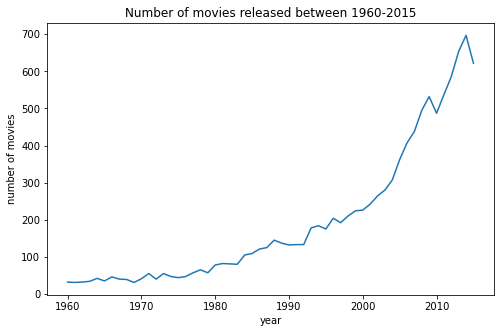

In [30]:
num_movie = df.groupby('release_year')['original_title'].count()
plt.figure(figsize=(8,5))

plt.plot(num_movie.index, num_movie.values);
plt.title('Number of movies released between 1960-2015');
plt.xlabel('year');
plt.ylabel('number of movies');

#### Conclusion
* The number of movies increase over years.
* Plot shows us The film industry is growing also the trend of growth has been strongly sharp since 2000.

### Which genres are most popular from year to year?

In [31]:
df.genres.value_counts()

Drama                                             712
Comedy                                            709
Documentary                                       311
Drama|Romance                                     289
Comedy|Drama                                      280
                                                 ... 
Drama|Fantasy|Mystery|Science Fiction|Thriller      1
Action|Adventure|Romance|Thriller                   1
Drama|Music|Mystery|Romance                         1
Action|War|Drama                                    1
Mystery|Drama|Crime|Thriller|Horror                 1
Name: genres, Length: 2037, dtype: int64

A lot of films has more than genres that seprated with '|', so we should seprate it and then calculate top 10 genres

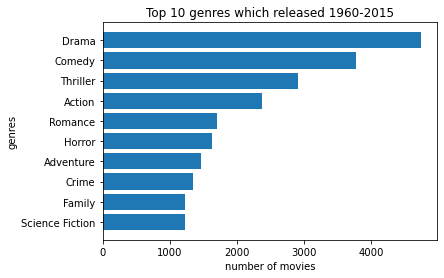

In [32]:
#Top 10 genres which released 1960-2015
genr = "|".join(df['genres']).split('|')
genr = pd.Series(genr)
gn = genr.value_counts()

plt.barh(gn.index[:10][::-1],gn.values[:10][::-1]);
plt.title('Top 10 genres which released 1960-2015');
plt.xlabel('number of movies');
plt.ylabel('genres');

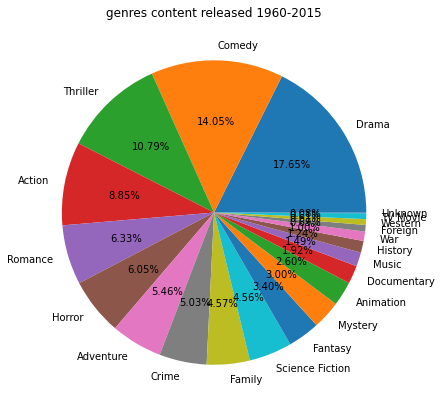

In [33]:
plt.figure(figsize=(7,7));
plt.pie(gn.values,labels=gn.index,autopct='%1.2f%%');
plt.title('genres content released 1960-2015');

In [34]:
#The most popular genres each year (1960-2015)
def pop_genre_yearly(data):
    most_pop_genre = {}
    for year in list(pd.Series(df['release_year'].unique()).sort_values()):
        df_year = df[df.release_year==year]
        genr = "|".join(df_year['genres']).split('|')
        genr = pd.Series(genr)
        gen = genr.value_counts().index[0]
        most_pop_genre[year]=gen
    return most_pop_genre     
pop_genre_yearly(df)        

{1960: 'Drama',
 1961: 'Drama',
 1962: 'Drama',
 1963: 'Drama',
 1964: 'Drama',
 1965: 'Drama',
 1966: 'Comedy',
 1967: 'Comedy',
 1968: 'Drama',
 1969: 'Drama',
 1970: 'Drama',
 1971: 'Drama',
 1972: 'Drama',
 1973: 'Drama',
 1974: 'Drama',
 1975: 'Drama',
 1976: 'Drama',
 1977: 'Drama',
 1978: 'Drama',
 1979: 'Drama',
 1980: 'Drama',
 1981: 'Drama',
 1982: 'Drama',
 1983: 'Drama',
 1984: 'Drama',
 1985: 'Comedy',
 1986: 'Drama',
 1987: 'Comedy',
 1988: 'Comedy',
 1989: 'Comedy',
 1990: 'Drama',
 1991: 'Drama',
 1992: 'Drama',
 1993: 'Drama',
 1994: 'Comedy',
 1995: 'Drama',
 1996: 'Drama',
 1997: 'Drama',
 1998: 'Drama',
 1999: 'Drama',
 2000: 'Drama',
 2001: 'Comedy',
 2002: 'Drama',
 2003: 'Drama',
 2004: 'Drama',
 2005: 'Drama',
 2006: 'Drama',
 2007: 'Drama',
 2008: 'Drama',
 2009: 'Drama',
 2010: 'Drama',
 2011: 'Drama',
 2012: 'Drama',
 2013: 'Drama',
 2014: 'Drama',
 2015: 'Drama'}

#### Conclusion
Drame and comedy respectively are most popular genres in film industry over the years

### most popular actors/actrees or directors?

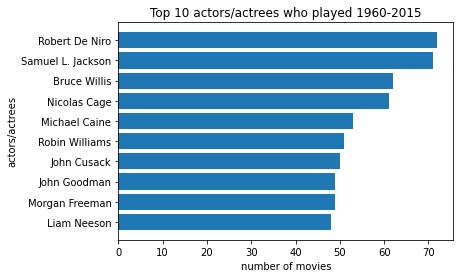

In [35]:
#Top 10 actors/actrees who played 1960-2015
cas = "|".join(df[df.cast!='Unknown']['cast']).split('|')
cas = pd.Series(cas)
cas = cas.value_counts()

plt.barh(cas.index[:10][::-1],cas.values[:10][::-1]);
plt.title('Top 10 actors/actrees who played 1960-2015');
plt.xlabel('number of movies');
plt.ylabel('actors/actrees');

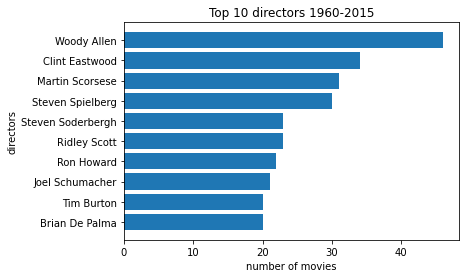

In [36]:
#Top 10 directors 1960-2015
dirc = "|".join(df[df.director!='Unknown']['director']).split('|')
dirc = pd.Series(dirc)
dirc = dirc.value_counts()

plt.barh(dirc.index[:10][::-1],dirc.values[:10][::-1]);
plt.title('Top 10 directors 1960-2015');
plt.xlabel('number of movies');
plt.ylabel('directors');

### Top 10 directors who get most vote score?

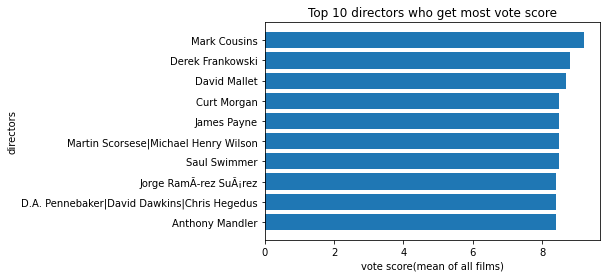

In [37]:
grouped = df.groupby('director')['vote_average'].mean()
top10 = grouped.sort_values(ascending=False)[:10]

plt.barh(top10.index[::-1], top10.values[::-1]);
plt.title('Top 10 directors who get most vote score');
plt.xlabel('vote score(mean of all films)');
plt.ylabel('directors');

#### Conclusion
* most popular cast respectively are: Robert Di Niro, Samuel L Jackson, Bruce Willis, Nicolas Cage
* Directors who make most films ever respectively are : Woody Allen, Clint Eastwood, Martin Scorsese, Steven Spielberg
* Directors who get most score ever respectively are : Mark Cousine, Derek Frankowski, David Mallet

### The trend of annual changes in film profits

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


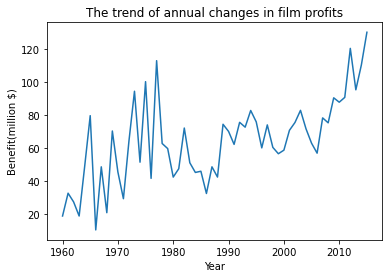

In [38]:
# Remove rows that budjet an revenue are zero
dff = df.loc[(df['budget']!=0)&(df['revenue']!=0)]
#Make benefit column
dff['benefit'] = dff['revenue']-dff['budget']
#Use groupby to find mean benefit in each year
grouped = dff.groupby('release_year')['benefit'].mean()
#Making plot
plt.plot(grouped.index,grouped.values);
plt.title('The trend of annual changes in film profits');
plt.xlabel('Year');
plt.ylabel('Benefit(million $)');

#### Conclusion
Film industry profits increase over years, from 20 million dollars in 1960  to  more than 120 million dollars in 2015

### What kinds of properties are associated with movies that have high revenues?

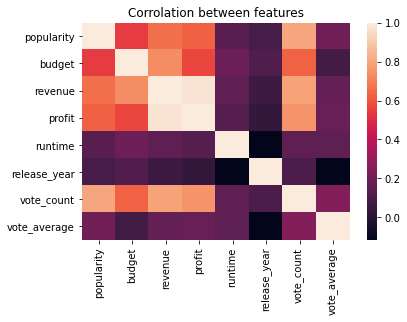

In [39]:
corr = df[['popularity','budget','revenue','profit','runtime','release_year','vote_count','vote_average']].corr()
sns.heatmap(corr);
plt.title('Corrolation between features');

#### Conclusion
 * __revenue corrolated positively with profit, vote_count, budget and popularity__
 * popularity corrolated positively with vote_count, revenue and profit
 * budet corrolated positively with revenue and vote_count
 * profit corrolated positively with revenue, vote_count and popularity
 * runtime corrolated negatively with release_year
 * release_year corrolated neatively with vote_average

## Final Conclusions

* the number of movies are increasing over years.
* Film industry profits increase over years
* The most frequent genre is Drama.
* popularity corrolated positively with vote_count, revenue and profit
* revenue corrolated positively with profit, vote_count, budget and popularity
* profit corrolated positively with revenue, vote_count and popularity

### Limitations:
* Missing values in the data effect the results.
* budget and revenue have alot of zeros values that ffect the results.
* inccorect values like as zeros in runtime.